# Feature Engineering

Workflow: 4

Goal: Create new composite features for analysis.

Result: Outputs the file ```merge_feature.csv```.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import sys
sys.path.append('../')
import lego_helper as lh

## Import Data

In [4]:
MERGE_FILE = '../data/merge_full.csv'

In [5]:
set_df = pd.read_csv(MERGE_FILE)
set_df.head()
set_df.info(verbose=True, null_counts=True)

,set_no,name,price_store,price_new,price_used,rating_value,rating_votes,theme_group,theme,subtheme,...,tiles_printed_tot_prts,tiles_special_tot_prts,tools_tot_prts,transportation_-_land_tot_prts,transportation_-_sea_and_air_tot_prts,tubes_and_hoses_tot_prts,wheels_and_tyres_tot_prts,windows_and_doors_tot_prts,windscreens_and_fuselage_tot_prts,znap_tot_prts
0,858-1,Auto Engines,NaN,NaN,51.0,4.5,2.0,Technical,Technic,NaN,...,0,0,0,0,0,6,2,0,0,0
1,1591-1,Danone Delivery Truck,NaN,129.0,28.0,NaN,NaN,Modern day,Town,Special,...,0,0,0,2,0,0,6,2,1,0
2,1592-1,Town Square - Castle Scene,NaN,1168.0,191.0,4.8,4.0,Modern day,Town,Classic,...,0,0,0,6,0,0,12,14,0,0
3,1651-2,Maersk Line Container Lorry,NaN,NaN,444.0,5.0,1.0,Modern day,Town,Special,...,0,0,0,7,0,0,28,7,1,0
4,3634-1,Charlie Crow's Carry-All,NaN,90.0,13.0,3.0,1.0,Junior,Fabuland,NaN,...,0,0,0,2,0,0,0,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 136 columns):
set_no                                              5303 non-null object
name                                                5303 non-null object
price_store                                         4178 non-null float64
price_new                                           5003 non-null float64
price_used                                          4972 non-null float64
rating_value                                        4560 non-null float64
rating_votes                                        4560 non-null float64
theme_group                                         5303 non-null object
theme                                               5303 non-null object
subtheme                                            3915 non-null object
year                                                5303 non-null int64
volume                                              2143 non-null float64
weight     

## Investigate the Filtered Sets

In [6]:
InteractiveShell.ast_node_interactivity = 'last'

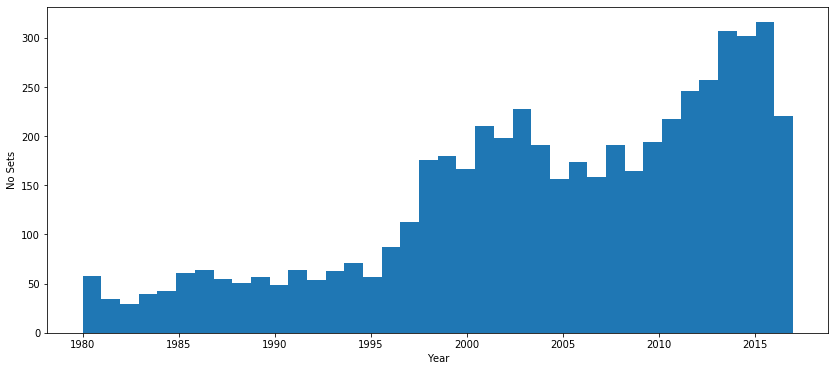

In [7]:
# sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

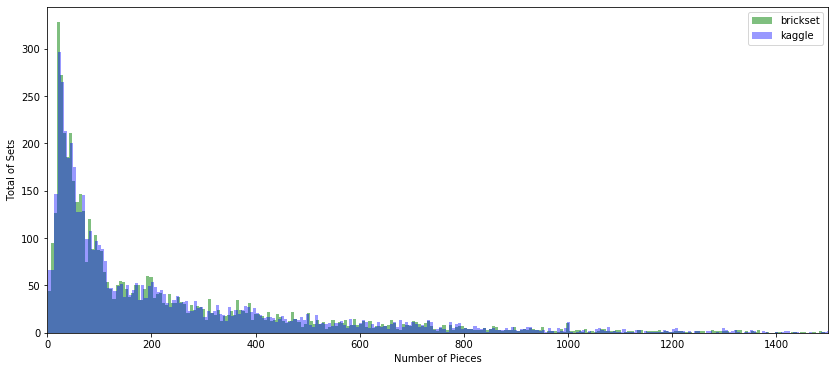

In [8]:
# piece count distribution brickset vs kaggle

piece_df = set_df.loc[(set_df['piece_cnt']>=1) & (set_df['total_parts']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Number of Pieces', ylabel='Total of Sets', xlim=(0, 1500))

axs.hist(piece_df['piece_cnt'].values, bins=1000, color='green', label='brickset', alpha=.5)
axs.hist(piece_df['total_parts'].values, bins=1000, color='blue', label='kaggle', alpha=.4)

plt.legend()
plt.show()

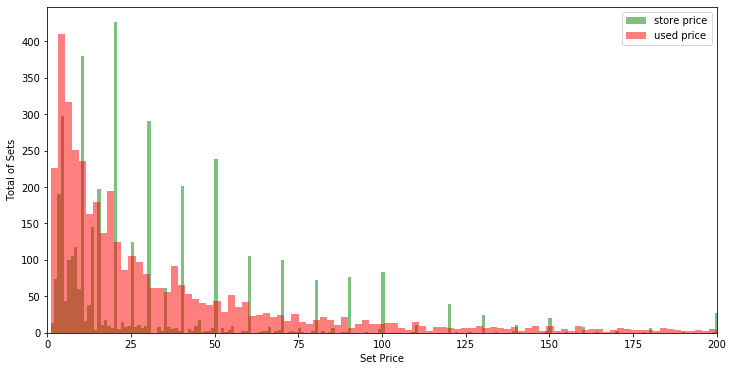

In [9]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(12, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

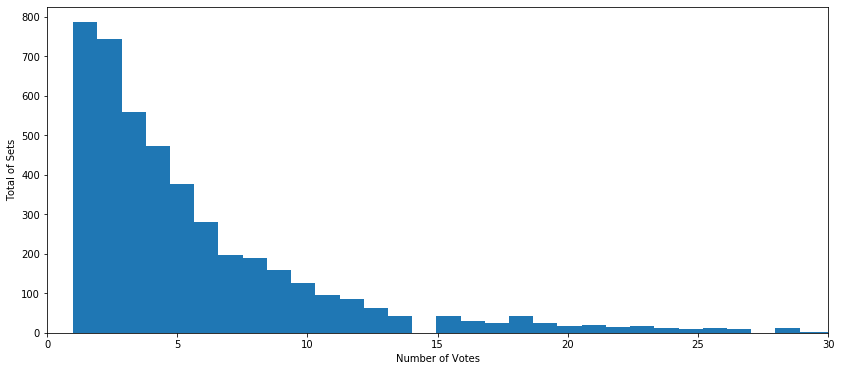

In [10]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

votes_df = set_df.loc[set_df['rating_votes'].isna()==False]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(votes_df['rating_votes'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

## Introduce Category

In [11]:
# create the category column for better splitting of themes

set_df['theme_group'].value_counts()

Modern day          1210
Licensed            1019
Action/Adventure     801
Model making         441
Historical           411
Constraction         391
Technical            379
Girls                285
Racing               218
Junior               148
Name: theme_group, dtype: int64

In [12]:
set_df['category'] = set_df.apply(lh.get_category, axis=1)
set_df['category'].value_counts()

Modern-Town          617
Advanced-models      548
Lego-Brand           528
Licensed-StarWars    439
Historical           411
Modern-City          394
Constraction         391
Licensed-Other       380
Technical            379
Sports               310
Bigfig-Girls         285
Space                273
Licensed-Movie       200
Bigfig-Junior        148
Name: category, dtype: int64

In [13]:
set_df.loc[ (set_df['category'].isna()) | (set_df['category']=='None') ][
    ['set_no', 'name', 'theme_group', 'theme', 'category']]

,set_no,name,theme_group,theme,category


## Clean the Colors

In [14]:
# check colors that are being used in sets

set_df['1st_color'].value_counts().head()

Black                2037
White                 869
Light Bluish Gray     432
Red                   310
Light Gray            295
Name: 1st_color, dtype: int64

In [15]:
# create new columns for super-colors 

set_df['scolor_1st'] = set_df['1st_color'].apply(lh.get_super_color)
set_df['scolor_2nd'] = set_df['2nd_color'].apply(lh.get_super_color)
set_df[['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd']].head()

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
0,858-1,Auto Engines,Technic,Blue,Blue,Light Gray,Gray
1,1591-1,Danone Delivery Truck,Town,White,White,Blue,Blue
2,1592-1,Town Square - Castle Scene,Town,Black,Black,Yellow,Yellow
3,1651-2,Maersk Line Container Lorry,Town,Maersk Blue,Blue,Light Gray,Gray
4,3634-1,Charlie Crow's Carry-All,Fabuland,Yellow,Yellow,Green,Green


In [16]:
# check for any remaining gaps 

set_df.loc[ (set_df['scolor_1st'].isna()) | (set_df['scolor_2nd'].isna()), 
            ['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd'] ]

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
429,8712-1,Technic Figures,Technic,Red,Red,[No Color],None
446,3647-1,Lionel Lion's Classroom,Fabuland,Yellow,Yellow,[No Color],None
716,8714-1,The LEGO Technic Guys,Technic,Trans-Clear,Transparent,[No Color],None
1565,8515-1,RoboRider Wheels,Technic,[No Color],None,[No Color],None
2015,3560-1,NBA Collectors # 1,Sports,Tan,Tan,[No Color],None
2017,3562-1,NBA Collectors # 3,Sports,Tan,Tan,[No Color],None
2020,3565-1,NBA Collectors # 6,Sports,Tan,Tan,[No Color],None
2021,3566-1,NBA Collectors # 7,Sports,Tan,Tan,[No Color],None
2723,9847-1,Bluetooth Dongle,Mindstorms,[No Color],None,[No Color],None
3441,2111-1,Kai,Ninjago,Red,Red,[No Color],None


In [17]:
# fix secondary colors by assigning primary color

set_df['scolor_2nd'] = set_df['scolor_2nd'].fillna(set_df['scolor_1st'])
set_df.loc[(set_df['scolor_2nd'].isna())].shape

(2, 139)

In [18]:
set_df['scolor_1st'].value_counts()

Black          2037
Gray           1026
White           869
Red             365
Yellow          300
Blue            240
Brown           139
Green           133
Tan             110
Transparent      75
Name: scolor_1st, dtype: int64

## Introduce Popularity

In [19]:
# popularity is a new feature for ratings

set_df['popularity'] = set_df['rating_value'] * set_df['rating_votes']
set_df['popularity'].head()

0     9.0
1     NaN
2    19.2
3     5.0
4     3.0
Name: popularity, dtype: float64

In [20]:
# visualize the popularity

popularity_df = set_df.loc[set_df['popularity'].isna()==False]
popularity_df.shape

(4560, 140)

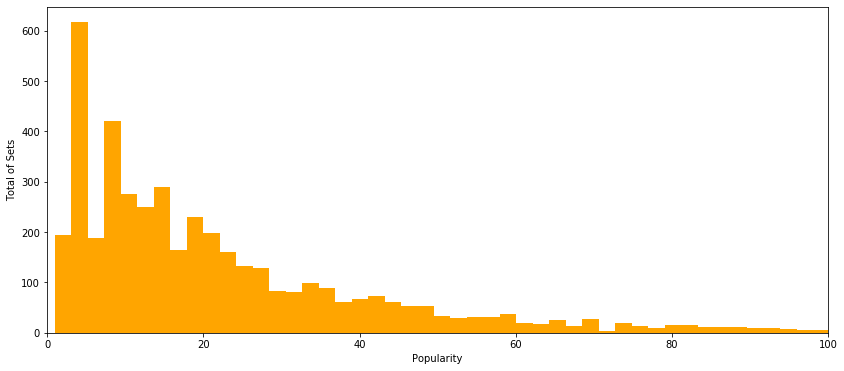

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

axs.hist(popularity_df['popularity'].values, bins=200, color='orange')
axs.set(xlabel='Popularity', ylabel='Total of Sets', xlim=(0, 100))  

plt.show()

## Introduce AfterMarket

In [22]:
# create aftermarket column 

set_df['aftermarket'] = set_df.apply(lh.get_aftermarket, axis=1)
set_df[['set_no', 'name', 'price_used', 'price_store', 'aftermarket']].head()

,set_no,name,price_used,price_store,aftermarket
0,858-1,Auto Engines,51.0,NaN,NaN
1,1591-1,Danone Delivery Truck,28.0,NaN,NaN
2,1592-1,Town Square - Castle Scene,191.0,NaN,NaN
3,1651-2,Maersk Line Container Lorry,444.0,NaN,NaN
4,3634-1,Charlie Crow's Carry-All,13.0,NaN,NaN


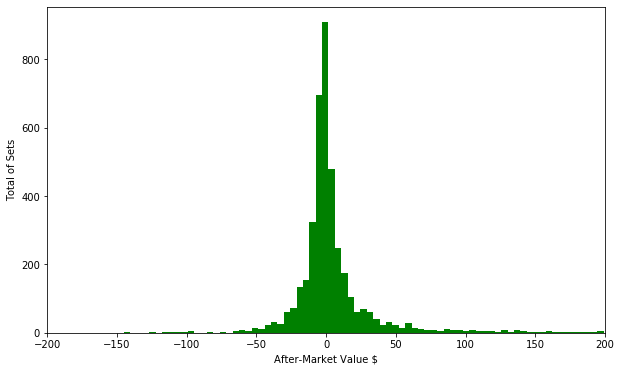

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')

axs.hist(set_df.loc[set_df['aftermarket'].isna()==False]['aftermarket'].values, bins=200, color='green')
axs.set(xlabel='After-Market Value $', ylabel='Total of Sets', xlim=(-200, 200))  

plt.show()

In [24]:
# compare positive and negative aftermarket per year

set_df.groupby(['year']).count()['set_no']

year
1980     58
1981     34
1982     29
1983     39
1984     43
1985     61
1986     64
1987     55
1988     51
1989     57
1990     49
1991     64
1992     54
1993     63
1994     71
1995     57
1996     87
1997    113
1998    176
1999    180
2000    167
2001    210
2002    198
2003    228
2004    191
2005    156
2006    174
2007    158
2008    191
2009    165
2010    194
2011    217
2012    246
2013    257
2014    307
2015    302
2016    316
2017    221
Name: set_no, dtype: int64

In [25]:
increase_df = set_df.loc[set_df['aftermarket']>0]

increase_df.shape

(1868, 141)

In [26]:
decrease_df = set_df.loc[set_df['aftermarket']<=0]

decrease_df.shape

(2167, 141)

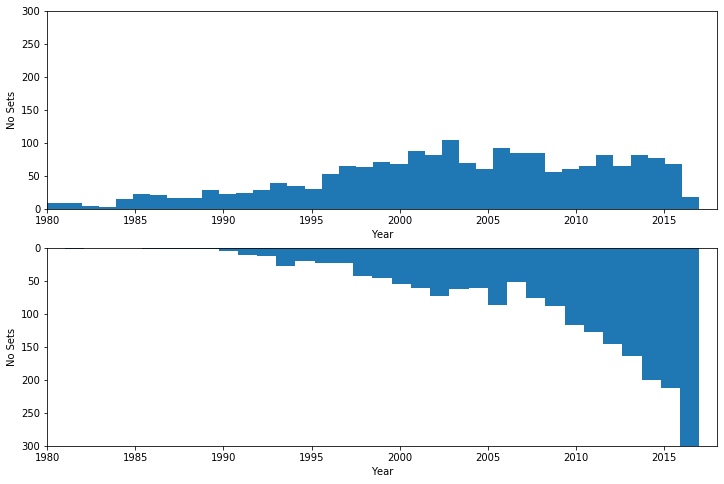

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].hist(increase_df['year'].values, bins=increase_df['year'].unique().shape[0])
axs[0].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 300))

axs[1].hist(decrease_df['year'].values, bins=decrease_df['year'].unique().shape[0])
axs[1].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 300))
axs[1].set_ylim(axs[1].get_ylim()[::-1])

plt.show()

## Calculating Inflation Adjusted Aftermarket Value Increase

In [28]:
# removing early years without much data and most recent year which hasn't enough time to appreciate
set_df = set_df.loc[(set_df.year > 1983) & (set_df.year < 2017)]

In [29]:
def inflation_adjusted_value(inflation_tuple):
    """
    Returns inflation adjusted value in 2019 dollars.
    Per https://smartasset.com/investing/inflation-calculator, 
    the average rate of inflation between 1984 and 2019 is 2.63%
    """
    value = inflation_tuple[0]
    for index in range(0, discount_tuple[1]):
        value *= 1.0263
    return round(value,2)
    return dataframe["adj_store_price"]

In [30]:
# def inflation_adjustment_loop(inflation_tupe)
#     """
#     Helper function used by inflation_adjusted_value() below.
#     Returns an inflation adjusted value based on tuple generated in
#     inflation_adjusted_value().
#     For use in a lambda function.
#     """
#     value = inflation_tuple[0]
#     for index in range(0, discount_tuple[1]):
#         value *= 1.0263
#     return round(value,2)

# def inflation_adjusted_value(dataframe, price_column, year_column):
#     """
#     Returns inflation adjusted value in 2019 dollars.
#     Per https://smartasset.com/investing/inflation-calculator, 
#     the average rate of inflation between 1984 and 2019 is 2.63%
#     """
#     temp_df = dataframe.copy()
#     temp_df["temp"] = list(zip(temp_df[price_column], 2019-temp_df[year_column]))
#     temp_df["temp"] = temp_df["temp"].apply(lambda x: inflation_adjustment_loop(x))
#     return temp_df["temp"]

In [31]:
set_df["adj_store_price"] = lh.inflation_adjusted_value(set_df,
                                                        "price_store",
                                                        "year")

In [32]:
# # generating a tuple with the store price and years since released
# # will be used in the following lambda function
# set_df["adj_store_price"] = list(zip(set_df["price_store"], 2019-set_df["year"]))
# set_df["adj_store_price"] = set_df["adj_store_price"].apply(lambda x: inflation_adjusted_value(x))

In [33]:
set_df["adj_aftermarket"] = set_df["price_used"] - set_df["adj_store_price"]

In [34]:
set_df["profitable"] = set_df["adj_aftermarket"].apply(lambda x: 1 if x > 0 else (0 if x <= 0 else np.nan))

In [35]:
set_df["profitable"].value_counts()

0.0    2816
1.0    1016
Name: profitable, dtype: int64

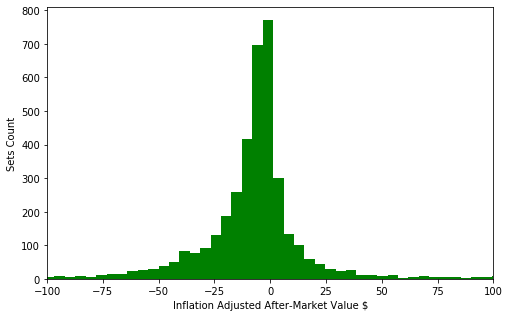

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5), facecolor='white')

axs.hist(set_df.loc[set_df['adj_aftermarket'].isna()==False]['adj_aftermarket'].values, bins=200, color='green')
axs.set(xlabel='Inflation Adjusted After-Market Value $', ylabel='Sets Count', xlim=(-100, 100))  

plt.show()

In [37]:
plot_df = pd.DataFrame(set_df["profitable"].value_counts()).reset_index()

plot_df['label'] = None
plot_df.at[0, 'label'] = 'Loss'
plot_df.at[1, 'label'] = 'Profit'

plot_df['percent'] = plot_df['profitable'] / sum(plot_df['profitable'] )

plot_df

,index,profitable,label,percent
0,0.0,2816,Loss,0.734864
1,1.0,1016,Profit,0.265136


<Figure size 432x504 with 0 Axes>

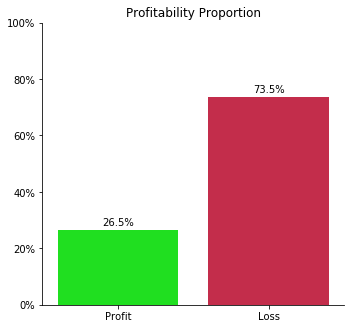

In [38]:
fig = plt.figure(figsize=(6, 7), facecolor='white')

sns.catplot(data=plot_df, x='label', y='percent', kind='bar', palette=['crimson', 'lime'])
ax = plt.gca()
ax.set(title='Profitability Proportion', xlabel='', ylabel='', ylim=(0, 1))
ylabels = ['{:.0f}%'.format(x) for x in ax.get_yticks() *100]
ax.set_yticklabels(ylabels)
ax.invert_xaxis()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+.01, str(round(p.get_height()*100,1))+"%", 
            fontsize=10, color='black', ha='center', va='bottom')
plt.subplots_adjust(top=.9)
plt.savefig("../assets/profitability.png");

## Clean the Features Dataset

In [39]:
set_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 160 to 5081
Data columns (total 144 columns):
set_no                                              4922 non-null object
name                                                4922 non-null object
price_store                                         3952 non-null float64
price_new                                           4672 non-null float64
price_used                                          4619 non-null float64
rating_value                                        4263 non-null float64
rating_votes                                        4263 non-null float64
theme_group                                         4922 non-null object
theme                                               4922 non-null object
subtheme                                            3630 non-null object
year                                                4922 non-null int64
volume                                              1973 non-null float64
weight   

In [40]:
drop_columns = ['price_new', 'rating_value', 'rating_votes',
                'theme_group', 'theme', 'subtheme', 'piece_cnt',
                'minifig_cnt', '1st_color', '2nd_color']

set_clean_df = set_df.drop(columns=drop_columns)

set_clean_df[2200:2205]

,set_no,name,price_store,price_used,year,volume,weight,number_parts,total_parts,number_spare_parts,...,windscreens_and_fuselage_tot_prts,znap_tot_prts,category,scolor_1st,scolor_2nd,popularity,aftermarket,adj_store_price,adj_aftermarket,profitable
2360,8621-1,Turaga Dume and Nivawk,20.0,21.0,2004,NaN,NaN,58,180,0,...,0,0,Constraction,Black,Gray,18.0,1.0,29.52,-8.52,0.0
2361,8622-1,Nidhiki,20.0,21.0,2004,NaN,NaN,46,173,2,...,0,0,Constraction,Black,Green,32.2,1.0,29.52,-8.52,0.0
2362,8623-1,Krekka,20.0,24.0,2004,NaN,NaN,68,214,0,...,0,0,Constraction,Black,Gray,19.2,4.0,29.52,-5.52,0.0
2363,8770-1,Danju,NaN,3.0,2004,NaN,NaN,19,43,1,...,0,0,Historical,Blue,Yellow,16.0,NaN,NaN,NaN,NaN
2364,8771-1,Jayko,NaN,4.0,2004,NaN,NaN,20,46,1,...,0,0,Historical,Blue,White,34.0,NaN,NaN,NaN,NaN


In [41]:
set_clean_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 160 to 5081
Data columns (total 134 columns):
set_no                                              4922 non-null object
name                                                4922 non-null object
price_store                                         3952 non-null float64
price_used                                          4619 non-null float64
year                                                4922 non-null int64
volume                                              1973 non-null float64
weight                                              1984 non-null float64
number_parts                                        4922 non-null int64
total_parts                                         4922 non-null int64
number_spare_parts                                  4922 non-null int64
total_spare_parts                                   4922 non-null int64
number_colors                                       4922 non-null int64
bars_ladders_and

In [42]:
save_path = r'../data/merge_feature.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'1.75 mb'